# Adult Dataset
[EDA for This dataset](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Notebooks/adult_EDA.ipynb)  
[Data for the same](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Data/adult.csv)

In [1]:
#Importing some necessary packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.features import ParallelCoordinates
from yellowbrick import classifier
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

from sklearn.naive_bayes import GaussianNB

In [2]:
#reading a file and adding column names to it.
names=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capial_gain','capital_loss','hours_per_week','native_country','salary']
data = pd.read_csv('../../Lab1/Romil/Data/adult.csv',header=None,names=names)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capial_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
#Replacing '?' with NaN value
data = data.replace('?',np.NaN)
#Dropping the null rows
data = data.dropna()
#Checking null values in all column
data.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capial_gain       0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

### Changing some of the column type into category 

In [4]:
data["workclass"] = data["workclass"].astype('category')
#data.workclass = data.workclass.cat.codes
data.marital_status = data.marital_status.astype('category')#.cat.codes
data.race = data.race.astype('category')#.cat.codes
data.relationship = data.relationship.astype('category')#.cat.codes
data.occupation = data.occupation.astype('category')#.cat.codes
data.native_country = data.native_country.astype('category')#.cat.codes
data.sex = data.sex.astype('category')#.cat.codes
data.salary = data.salary.astype('category').cat.codes

data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capial_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


### Correlation map

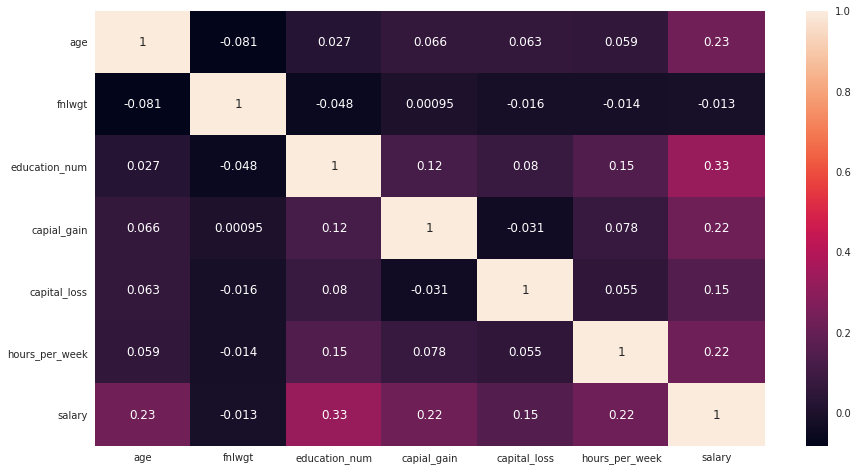

In [5]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data.corr(),annot=True)

In [6]:
data.dtypes

age                  int64
workclass         category
fnlwgt             float64
education           object
education_num      float64
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capial_gain        float64
capital_loss       float64
hours_per_week     float64
native_country    category
salary                int8
dtype: object

In [7]:
#Taking educatoin and capital gain as a main features
X = data[['education_num','capial_gain']]
y = data.salary

In [8]:
#Standardizing the data
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)


In [9]:
#Splitting dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)
X_train.shape,X_test.shape,X.shape

((12219, 2), (5238, 2), (17457, 2))

### Making lr1 as normal logistic regression

In [10]:

lr1 = LogisticRegression()
lr1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
#Mean accuracy of lr1 model
lr1.score(X_test,y_test)

0.800114547537228

### Making lr2 with solver newton method

In [12]:
lr2 = LogisticRegression(random_state=0,solver='newton-cg')
lr2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
#Mean accuracy of lr2 model
lr2.score(X_test,y_test)

0.800114547537228

### Plotting the decision boundary

In [14]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

In [15]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

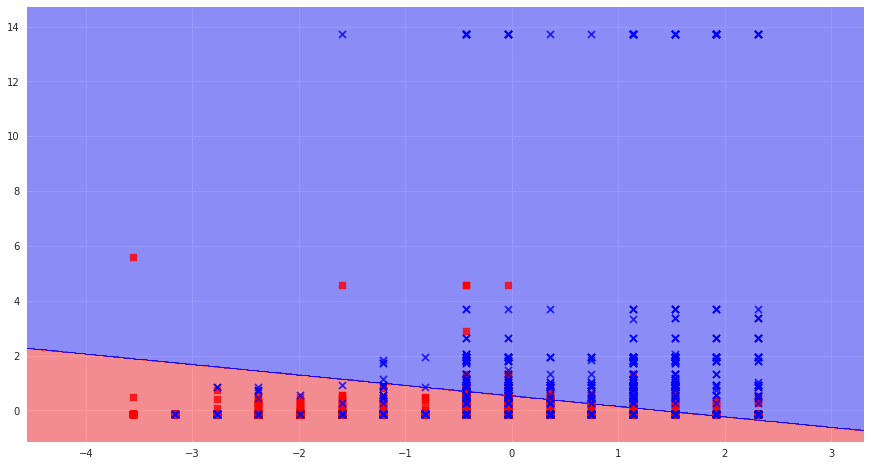

In [16]:
plot_decision_regions(X_combined,
                      y_combined, classifier=lr1,
                      test_idx=range(12219,17457))

In [20]:
y_pred = lr1.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred,normalize=False), 'correctly labelled out of',X_test.shape[0])

4191 correctly labelled out of 5238
